In [1]:
# Load libraries
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load dataset
linkname = "https://raw.githubusercontent.com/GerhardTrippen/DataSets/master/churn.txt"

dataset = read_csv(linkname)

# Make sure that the linkname assignment is in ONE
# SINGLE line!
# Without any spaces in the link!

In [4]:
# shape
print(dataset.shape)

(3333, 21)


In [5]:
# head
print(dataset.head(10))

  State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   
5    AL             118        510  391-8027        yes         no   
6    MA             121        510  355-9993         no        yes   
7    MO             147        415  329-9001        yes         no   
8    LA             117        408  335-4719         no         no   
9    WV             141        415  330-8173        yes        yes   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103  

In [6]:
# descriptions
print(dataset.describe())

       Account Length    Area Code  VMail Message     Day Mins    Day Calls  \
count     3333.000000  3333.000000    3333.000000  3333.000000  3333.000000   
mean       101.064806   437.182418       8.099010   179.775098   100.435644   
std         39.822106    42.371290      13.688365    54.467389    20.069084   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.700000    87.000000   
50%        101.000000   415.000000       0.000000   179.400000   101.000000   
75%        127.000000   510.000000      20.000000   216.400000   114.000000   
max        243.000000   510.000000      51.000000   350.800000   165.000000   

        Day Charge     Eve Mins    Eve Calls   Eve Charge   Night Mins  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean     30.562307   200.980348   100.114311    17.083540   200.872037   
std       9.259435    50.713844    19.922625     4.310668    50.57

In [7]:
# class distribution
print(dataset.groupby('Churn?').size())

Churn?
False.    2850
True.      483
dtype: int64


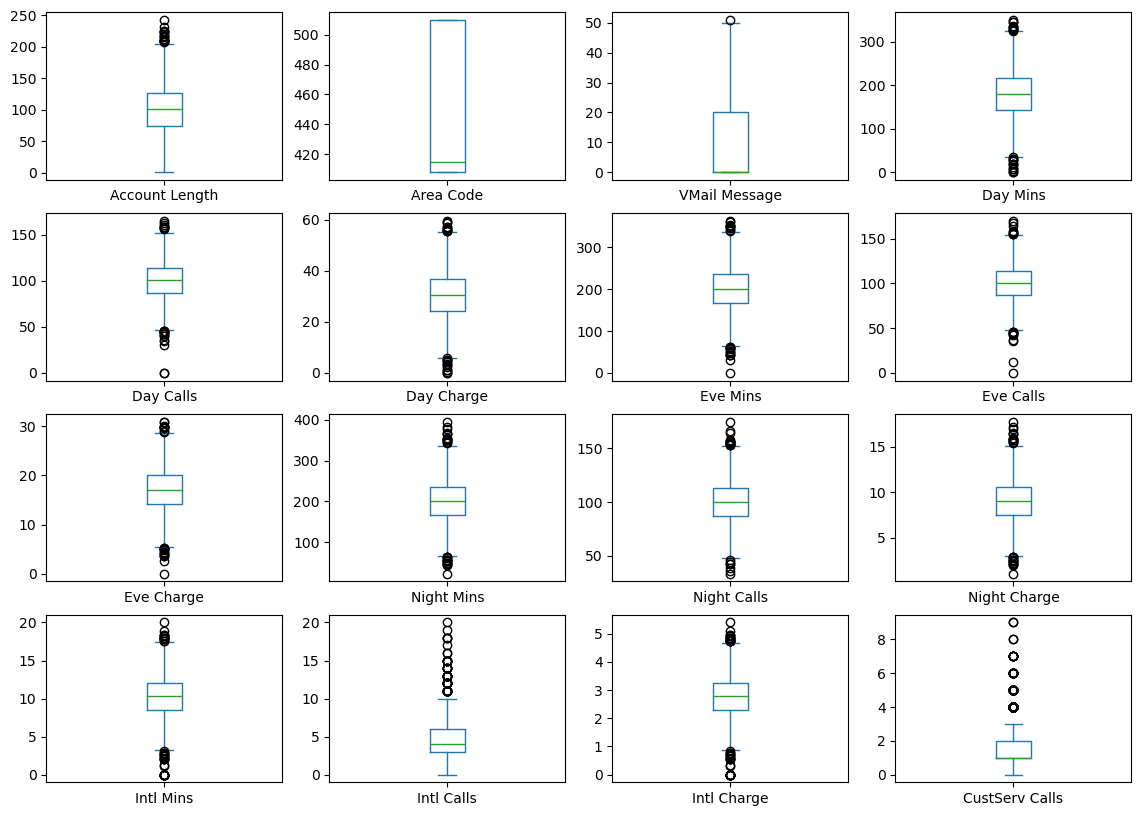

In [8]:
# some minimal Exploratory Data Analysis (EDA)

# box and whisker plots
dataset.plot(figsize=(14,10), kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

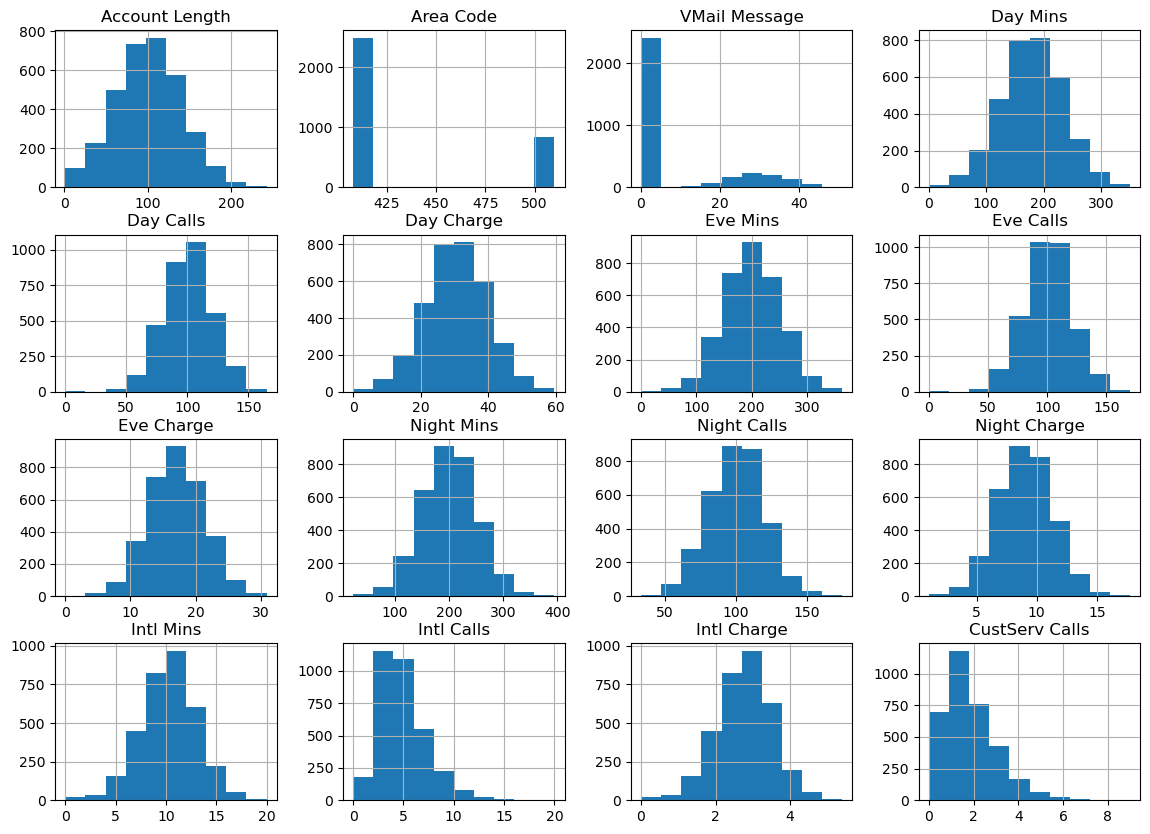

In [9]:
# histograms
dataset.hist(figsize=(14,10))
plt.show()

In [10]:
dataset.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

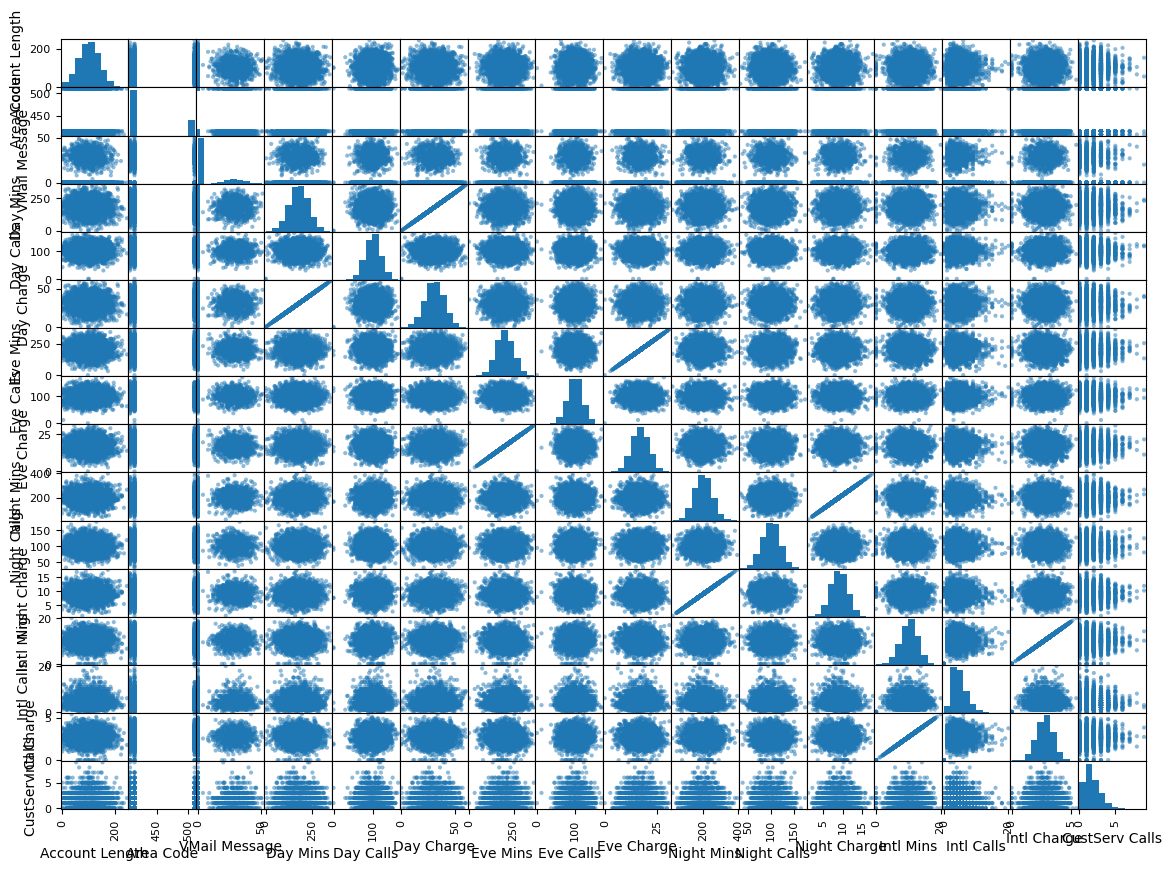

In [11]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(14,10))
plt.show()

In [12]:
# Why were there only 16 plots of each type
# if there are 20 predictors?

# show data set info
dataset.info()
# should be done earlier!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [13]:
# transform "Int'l Plan" and "VMail Plan" 
# into numerical values 0/1.
dataset["Int'l Plan"] = dataset["Int'l Plan"]. map({'yes': 1, 'no': 0})
dataset["VMail Plan"] = dataset["VMail Plan"]. map({'yes': 1, 'no': 0})

In [14]:
# drop columns "State" and "Phone" (number)
dataset.drop(columns=["State", "Phone"], inplace=True)
# this is new in pandas version 0.21.0.

In [15]:
dataset.head(10)

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [16]:
# separate features from target
# get values of dataframe
array = dataset.values
print(array)

[[128 415 0 ... 2.7 1 'False.']
 [107 415 0 ... 3.7 1 'False.']
 [137 415 0 ... 3.29 0 'False.']
 ...
 [28 510 0 ... 3.81 2 'False.']
 [184 510 1 ... 1.35 2 'False.']
 [74 415 0 ... 3.7 0 'False.']]


In [17]:
# features = predictor/independent/explanatory variables
X = array[:,0:18] #18th column is our target, not including 18 # X = array[:,0:-1]
print(X)

[[128 415 0 ... 3 2.7 1]
 [107 415 0 ... 3 3.7 1]
 [137 415 0 ... 5 3.29 0]
 ...
 [28 510 0 ... 6 3.81 2]
 [184 510 1 ... 10 1.35 2]
 [74 415 0 ... 4 3.7 0]]


In [18]:
# target variable = dependent/response variable
y = array[:,18] #y = array[:,-1]
print(y)

['False.' 'False.' 'False.' ... 'False.' 'False.' 'False.']


In [19]:
# Split off test dataset
# 1/5 of the data will be used for testing (not be seeing)
test_size = 0.20
seed = 7

In [20]:
# select 1/5 randomly and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
print(X_train) # 80% of x
print(y_train) # corresponding answer for x
print(X_test)
print(y_test)
# If necessary, function could be called with stratify=y to ensures that training/testing set have equally balanced(stratified) classes as given in y.

[[148 510 0 ... 9 3.94 1]
 [87 510 0 ... 3 3.62 1]
 [139 510 1 ... 6 3.62 1]
 ...
 [190 415 0 ... 3 2.3 0]
 [180 510 0 ... 5 4.24 2]
 [94 415 0 ... 7 3.0 2]]
['False.' 'False.' 'True.' ... 'False.' 'False.' 'False.']
[[104 408 0 ... 5 2.65 1]
 [122 415 0 ... 8 3.7 2]
 [145 415 0 ... 2 0.3 2]
 ...
 [98 415 1 ... 7 2.92 1]
 [100 415 1 ... 2 3.13 2]
 [49 415 0 ... 7 4.21 0]]
['False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.' 'False.'
 'False.' 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'True.' 'False.' 'True.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'F

In [21]:
# Algorithms
models = []
#models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [22]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed) #9 pieces for trainig (fold), 10th for validation
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.852986 (0.022265)


/Users/jiananchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jiananchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

KNN: 0.876247 (0.023091)
CART: 0.908488 (0.008802)
NB: 0.866475 (0.012920)
SVM: 0.856733 (0.022421)


In [23]:
results # results for LDA, KNN, CART, NB, SVM

[array([0.83146067, 0.85018727, 0.8576779 , 0.8576779 , 0.79775281,
        0.86142322, 0.86842105, 0.85714286, 0.88345865, 0.86466165]),
 array([0.84269663, 0.8576779 , 0.86516854, 0.87265918, 0.84269663,
        0.90262172, 0.90601504, 0.89473684, 0.87593985, 0.90225564]),
 array([0.90636704, 0.89138577, 0.90636704, 0.91011236, 0.91011236,
        0.8988764 , 0.90601504, 0.91353383, 0.91729323, 0.92481203]),
 array([0.88014981, 0.86516854, 0.86516854, 0.86516854, 0.83520599,
        0.86516854, 0.87218045, 0.86090226, 0.88721805, 0.86842105]),
 array([0.83146067, 0.86142322, 0.85018727, 0.87265918, 0.80524345,
        0.86891386, 0.87969925, 0.86090226, 0.85338346, 0.88345865])]

[array([0.83146067, 0.85018727, 0.8576779 , 0.8576779 , 0.79775281,
       0.86142322, 0.86842105, 0.85714286, 0.88345865, 0.86466165]), array([0.84269663, 0.8576779 , 0.86516854, 0.87265918, 0.84269663,
       0.90262172, 0.90601504, 0.89473684, 0.87593985, 0.90225564]), array([0.90636704, 0.89138577, 0.90636704, 0.91011236, 0.91011236,
       0.8988764 , 0.90601504, 0.91353383, 0.91729323, 0.92481203]), array([0.88014981, 0.86516854, 0.86516854, 0.86516854, 0.83520599,
       0.86516854, 0.87218045, 0.86090226, 0.88721805, 0.86842105]), array([0.83146067, 0.86142322, 0.85018727, 0.87265918, 0.80524345,
       0.86891386, 0.87969925, 0.86090226, 0.85338346, 0.88345865])]


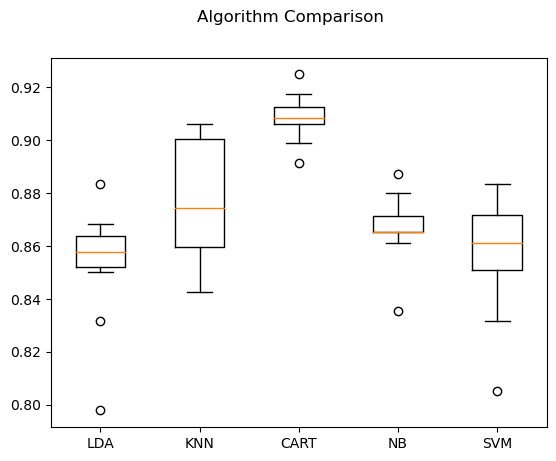

In [24]:
# Compare Algorithms
print(results)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
# Make predictions on test dataset
# instantiate learning model
cart = DecisionTreeClassifier()

In [26]:
# fitting the model
cart.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# predict the response
predictions = cart.predict(X_test) # classifications
print(predictions)

['False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'True.' 'False.' 'True.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.' 'False.'
 'False.' 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'True.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'True.' 'True.' 'False.' 'True.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'True.' 'True.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' '

In [28]:
print(y_test) #correct answer

['False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.' 'False.'
 'False.' 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'True.' 'False.' 'True.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'True.' 'False.' 'False.'
 'False.' 'False.' 'True.' 'False.' 'True.' 'False.' 'True.' 'True.'
 'False.' 'False.' 'False.' 'False.' 'True.' 'True.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'True.' 'False.' 'False.' 'Fa

In [29]:
# evaluate accuracy
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))#diagonals are correct/incorrect predictions
print(classification_report(y_test, predictions))

0.9115442278860569
[[533  33]
 [ 26  75]]
              precision    recall  f1-score   support

      False.       0.95      0.94      0.95       566
       True.       0.69      0.74      0.72       101

    accuracy                           0.91       667
   macro avg       0.82      0.84      0.83       667
weighted avg       0.91      0.91      0.91       667

